### Importing libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('world-data-2023.csv')

### Cleaning the data

#### Remove % and , characters from the dataframe to transform some variables to numeric

In [36]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [37]:
df = df.applymap(lambda x: x.translate(str.maketrans('','','%,')) if pd.notna(x) and type(x) == str else x)

In [38]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10,652230,323000,32.49,93.0,Kabul,8672,...,78.40,0.28,38041754,48.90,9.30,71.40,11.12,9797273,33.939110,67.709953
1,Albania,105,AL,43.10,28748,9000,11.78,355.0,Tirana,4536,...,56.90,1.20,2854191,55.70,18.60,36.60,12.33,1747593,41.153332,20.168331
2,Algeria,18,DZ,17.40,2381741,317000,24.28,213.0,Algiers,150006,...,28.10,1.72,43053054,41.20,37.20,66.10,11.70,31510100,28.033886,1.659626
3,Andorra,164,AD,40.00,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40,3.33,77142,NaN,NaN,NaN,NaN,67873,42.506285,1.521801
4,Angola,26,AO,47.50,1246700,117000,40.73,244.0,Luanda,34693,...,33.40,0.21,31825295,77.50,9.20,49.10,6.89,21061025,-11.202692,17.873887


### Transform columns (that can be changed to numeric) to numeric

In [39]:
df = df.apply(pd.to_numeric,errors='ignore')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    int64  
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

### Rename some columns

In [41]:
cols_rename_dict = {'Density\n(P/Km2)':'Density (p/km^2)',
                    'Agricultural Land( %)':'Agricultural Land (%)',
                    'Land Area(Km2)':'Land Area (km^2)',
                    }

In [42]:
df = df.rename(columns = cols_rename_dict)

In [43]:
df.head()

,Country,Density (p/km^2),Abbreviation,Agricultural Land (%),Land Area (km^2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


## **NaN examination - different methods**

### Method 1. Getting the sum of NaN values for each column

#### This is by far the most straightforward approach. It's downside is that it displays columns that have 0 NaN values

In [44]:
df.isna().sum().sort_values(ascending=False)

Minimum wage                                 45
Tax revenue (%)                              26
Armed Forces size                            24
Gasoline Price                               20
Unemployment rate                            19
Population: Labor force participation (%)    19
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Maternal mortality ratio                     14
Total tax rate                               12
Gross tertiary education enrollment (%)      12
Life expectancy                               8
Physicians per thousand                       7
Out of pocket health expenditure              7
Gross primary education enrollment (%)        7
Fertility Rate                                7
Co2-Emissions                                 7
Agricultural Land (%)                         7
Abbreviation                                  7
Forested Area (%)                       

### <br>Method 2: Improved version of the previous method.</br> <br>It doesn't display columns with 0 NaN values, but it doesn't sort the values.</br> <br>It would be also informative to know what's the share of the sum of NaN values per each column in the overall sum of NaN values in the dataframe</br>

In [45]:
for column in df.columns.to_list():
    if df[column].isna().sum() > 0:
        print(f'{column}: NaN count: {df[column].isna().sum()}\n')
    else:
        continue

Abbreviation: NaN count: 7

Agricultural Land (%): NaN count: 7

Land Area (km^2): NaN count: 1

Armed Forces size: NaN count: 24

Birth Rate: NaN count: 6

Calling Code: NaN count: 1

Capital/Major City: NaN count: 3

Co2-Emissions: NaN count: 7

CPI: NaN count: 17

CPI Change (%): NaN count: 16

Currency-Code: NaN count: 15

Fertility Rate: NaN count: 7

Forested Area (%): NaN count: 7

Gasoline Price: NaN count: 20

GDP: NaN count: 2

Gross primary education enrollment (%): NaN count: 7

Gross tertiary education enrollment (%): NaN count: 12

Infant mortality: NaN count: 6

Largest city: NaN count: 6

Life expectancy: NaN count: 8

Maternal mortality ratio: NaN count: 14

Minimum wage: NaN count: 45

Official language: NaN count: 1

Out of pocket health expenditure: NaN count: 7

Physicians per thousand: NaN count: 7

Population: NaN count: 1

Population: Labor force participation (%): NaN count: 19

Tax revenue (%): NaN count: 26

Total tax rate: NaN count: 12

Unemployment rate: N

### <br>Method 3: Take into account only columns with > 0 NaN values and then append the data to a list of tulpes.</br> <br>Then sort the output by the NaN sum per each column and print the result</br>

In [46]:
nan_counts = []
for column in df.columns.to_list():
    if df[column].isna().sum() > 0:
        nan_counts.append((column, df[column].isna().sum()))

In [47]:
nan_counts.sort(key = lambda x: x[1],reverse=True)

In [48]:
nan_counts

[('Minimum wage', 45),
 ('Tax revenue (%)', 26),
 ('Armed Forces size', 24),
 ('Gasoline Price', 20),
 ('Population: Labor force participation (%)', 19),
 ('Unemployment rate', 19),
 ('CPI', 17),
 ('CPI Change (%)', 16),
 ('Currency-Code', 15),
 ('Maternal mortality ratio', 14),
 ('Gross tertiary education enrollment (%)', 12),
 ('Total tax rate', 12),
 ('Life expectancy', 8),
 ('Abbreviation', 7),
 ('Agricultural Land (%)', 7),
 ('Co2-Emissions', 7),
 ('Fertility Rate', 7),
 ('Forested Area (%)', 7),
 ('Gross primary education enrollment (%)', 7),
 ('Out of pocket health expenditure', 7),
 ('Physicians per thousand', 7),
 ('Birth Rate', 6),
 ('Infant mortality', 6),
 ('Largest city', 6),
 ('Urban_population', 5),
 ('Capital/Major City', 3),
 ('GDP', 2),
 ('Land Area (km^2)', 1),
 ('Calling Code', 1),
 ('Official language', 1),
 ('Population', 1),
 ('Latitude', 1),
 ('Longitude', 1)]

In [49]:
nan_counts.sort(key=lambda x: x[1],reverse=True)

In [50]:
for column,count in nan_counts:
    print(f'{column}: nan_count {count}\n{column}: nan_share {(count/np.sum(df.isna().sum())).round(4)}\n')

Minimum wage: nan_count 45
Minimum wage: nan_share 0.1335

Tax revenue (%): nan_count 26
Tax revenue (%): nan_share 0.0772

Armed Forces size: nan_count 24
Armed Forces size: nan_share 0.0712

Gasoline Price: nan_count 20
Gasoline Price: nan_share 0.0593

Population: Labor force participation (%): nan_count 19
Population: Labor force participation (%): nan_share 0.0564

Unemployment rate: nan_count 19
Unemployment rate: nan_share 0.0564

CPI: nan_count 17
CPI: nan_share 0.0504

CPI Change (%): nan_count 16
CPI Change (%): nan_share 0.0475

Currency-Code: nan_count 15
Currency-Code: nan_share 0.0445

Maternal mortality ratio: nan_count 14
Maternal mortality ratio: nan_share 0.0415

Gross tertiary education enrollment (%): nan_count 12
Gross tertiary education enrollment (%): nan_share 0.0356

Total tax rate: nan_count 12
Total tax rate: nan_share 0.0356

Life expectancy: nan_count 8
Life expectancy: nan_share 0.0237

Abbreviation: nan_count 7
Abbreviation: nan_share 0.0208

Agricultural

### Method 4: Plotting the sum of NaN values for each column

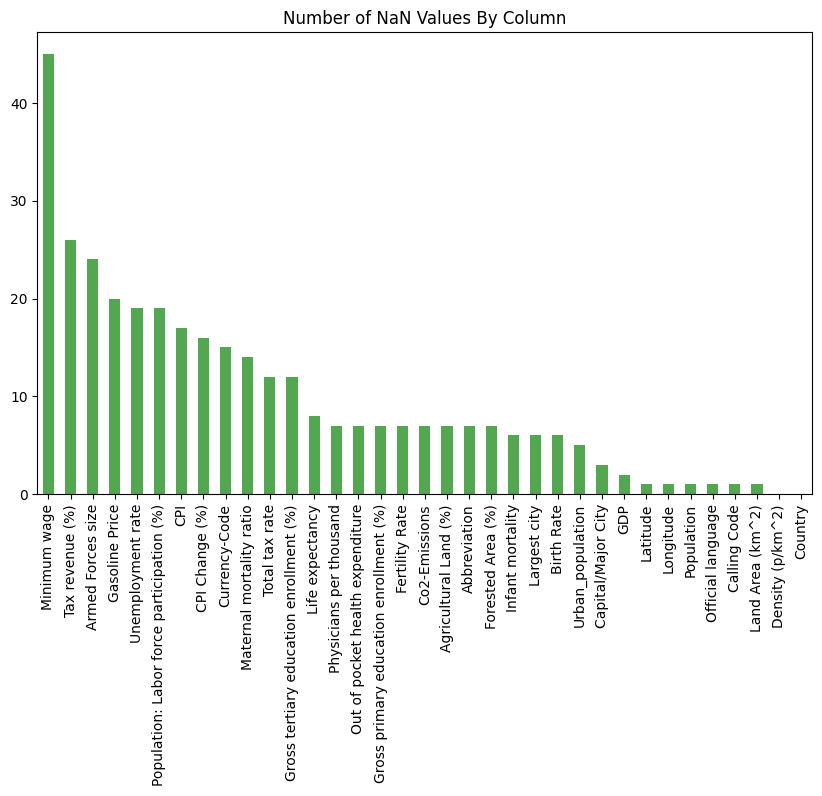

In [51]:
plt.figure(figsize=(10,6))
df.isna().sum().sort_values(ascending=False).plot(kind='bar',color='#53A751')
plt.title('Number of NaN Values By Column')
plt.show()

### <br>Method 5: Creating a data frame from appended data</br> <br>(a dictionary containing data about sum of NaN values per each column)</br>

In [52]:
nan_col_count = []
for column in df.columns.to_list():
    if df[column].isna().sum() > 0:
        nan_col_count.append({'column': column,
                              'nan_count':df[column].isna().sum()})

In [53]:
df_nan = pd.DataFrame(nan_col_count)
df_nan['total_nan'] = df_nan['nan_count'].sum(axis=0)
df_nan['%NaN'] = df_nan['nan_count'] / df_nan['total_nan']
df_nan['%NaN'] = df_nan['%NaN'].round(2)
df_nan = df_nan.sort_values('nan_count',ascending=False)
df_nan

,column,nan_count,total_nan,%NaN
21,Minimum wage,45,337,0.13
27,Tax revenue (%),26,337,0.08
3,Armed Forces size,24,337,0.07
13,Gasoline Price,20,337,0.06
29,Unemployment rate,19,337,0.06
26,Population: Labor force participation (%),19,337,0.06
8,CPI,17,337,0.05
9,CPI Change (%),16,337,0.05
10,Currency-Code,15,337,0.04
20,Maternal mortality ratio,14,337,0.04
